# Fitting max-stable PCA to max-linear models

In [1]:
library(evd)
library(maxstablePCA)
library(dplyr)
library(GGally)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
set.seed(421421)
s <- 200

In [11]:
A1 <- matrix(
    c(
        6/10, 4 / 10, 1/10, 6 / 17, 6 / 18, 
        3 / 10, 4 / 10, 1 / 10, 3 / 17, 4 / 18, 
        1 / 10, 2 / 10, 8 / 10, 8 / 17, 8 / 18
     ), 
    5, 3
)

A2 <- matrix(
    c(
        2/3, 2/3, 0, 0, 1 / 5, 
        0, 1/3, 2/3, 1/3, 3 / 5, 
        1 / 3, 0, 1/3, 2/3, 1 / 5
     ), 
    5, 3
)

In [4]:
library(foreach)
library(doParallel)

#setup parallel backend to use many processors
cores=detectCores()
cl <- makeCluster(cores[1]-1) #not to overload your computer
registerDoParallel(cl)

emp_errors_A1 <- foreach(i=1:100, .combine=c) %dopar% {
    
    library(evd)
    library(maxstablePCA)
    
    Z1 <- matrix(rfrechet(30000), 10000, 3)
    X1 <- t(maxmatmulC(A1, t(Z1)))
    X1trafo <- transform_unitpareto(X1)
    
    maxPCA_curr <- max_stable_prcomp(X1trafo, p = 3, s = s)
    
   emp_error_curr = maxPCA_curr$loss_fctn_value
   emp_error_curr 
}

#stop cluster
stopCluster(cl)

Loading required package: iterators

Loading required package: parallel



In [5]:
emp_errors_A1

[1] 0.31050414 0.33653432 0.35704403 0.37600607 0.36577641 0.30502736
  [7] 0.31491808 0.37624251 0.18203801 0.42893234 0.12837225 0.35359909
 [13] 0.35389632 0.36801929 0.08331830 0.36344399 0.30756158 0.37954460
 [19] 0.15036924 0.36200358 0.74900855 0.35100060 0.38207994 0.11513018
 [25] 0.29653875 0.08337196 0.33786326 0.10521662 0.08471605 0.39191129
 [31] 0.34214591 0.43491779 0.13740186 0.10316390 0.08504338 0.37223345
 [37] 0.39133401 0.32039055 0.34407166 0.54022793 0.32278821 0.36109578
 [43] 0.32497481 0.35785458 0.66321495 1.04188775 0.69965924 0.08345769
 [49] 0.32683137 0.14194178 0.10798810 0.36177910 0.42523420 0.38775093
 [55] 0.67525808 0.06489501 0.10823594 0.66386898 0.32982498 0.38412788
 [61] 0.10380679 0.44397479 0.70510501 0.12189409 0.15911968 0.42380738
 [67] 0.70387332 0.35565283 0.33651812 0.66830600 0.32854231 0.37271070
 [73] 0.12155557 0.41231347 0.37425685 0.06807901 0.32600582 0.11122703
 [79] 0.44591780 0.09948336 0.11544711 0.38901392 0.08366004 0.19630669
 [85] 0.34613310 0.34079164 0.40861514 0.37236813 0.37524393 0.38007732
 [91] 0.40374420 0.43394545 0.34592204 0.46750937 0.35072192 0.17081803
 [97] 0.26601187 0.11881018 0.07314641 0.27662638

In [12]:
library(foreach)
library(doParallel)

#setup parallel backend to use many processors
cores=detectCores()
cl <- makeCluster(cores[1]-1) #not to overload your computer
registerDoParallel(cl)

emp_errors_A2 <- foreach(i=1:100, .combine=c) %dopar% {
    
    library(evd)
    library(maxstablePCA)
    
    Z2 <- matrix(rfrechet(30000), 10000, 3)
    X2 <- t(maxmatmulC(A2, t(Z2)))
    X2trafo <- transform_unitpareto(X2)
    
    maxPCA_curr <- max_stable_prcomp(X2trafo, p = 3, s = s)
    
   emp_error_curr = maxPCA_curr$loss_fctn_value
   emp_error_curr 
}

#stop cluster
stopCluster(cl)

In [13]:
emp_errors_A2

[1] 1.3960735 1.1338680 0.5937335 0.4687600 0.6290184 1.0616575 0.4764501
  [8] 0.6326933 0.4753054 0.4040604 1.3544568 0.5448959 0.4822299 0.7280222
 [15] 0.6403295 0.5196745 0.4378285 1.2450930 0.6001533 0.9365601 0.5658957
 [22] 0.5732895 1.0133697 0.5749458 0.5729827 0.8576077 0.6738300 0.5187947
 [29] 0.4312050 0.5012056 0.5049188 0.5773797 0.9814307 0.6716715 1.1206915
 [36] 0.4595538 1.1656015 0.5340672 0.8998510 0.5801418 0.4531555 0.9190554
 [43] 1.1608277 0.5219122 0.9299506 0.5715610 0.5770596 1.1153594 0.5347704
 [50] 0.4753963 0.5279423 0.4968165 0.4540879 0.4151112 0.3870576 0.5393017
 [57] 1.0418469 0.5345120 0.6677006 0.8182209 0.6364146 0.6275798 1.2501604
 [64] 0.5327027 0.6040848 0.4762376 0.5854579 1.7715753 0.6387037 0.4688724
 [71] 0.5787668 0.6000520 0.5959073 0.6863115 0.6857013 1.0258522 0.6611392
 [78] 0.9717287 0.6886763 0.5439599 1.1926425 0.5247772 0.6121139 0.5337472
 [85] 0.9903119 0.7213102 0.4700645 0.6806191 0.5348839 0.5329784 0.8577981
 [92] 0.6370078 1.0361796 1.4081575 0.4154953 1.0671372 0.7399121 0.7196839
 [99] 0.7067438 1.0196519

In [14]:
plot_dat <- data.frame(emp_errors = c(emp_errors_A1, emp_errors_A2), simulation = c(rep("A1", 100), rep("A2", 100)))

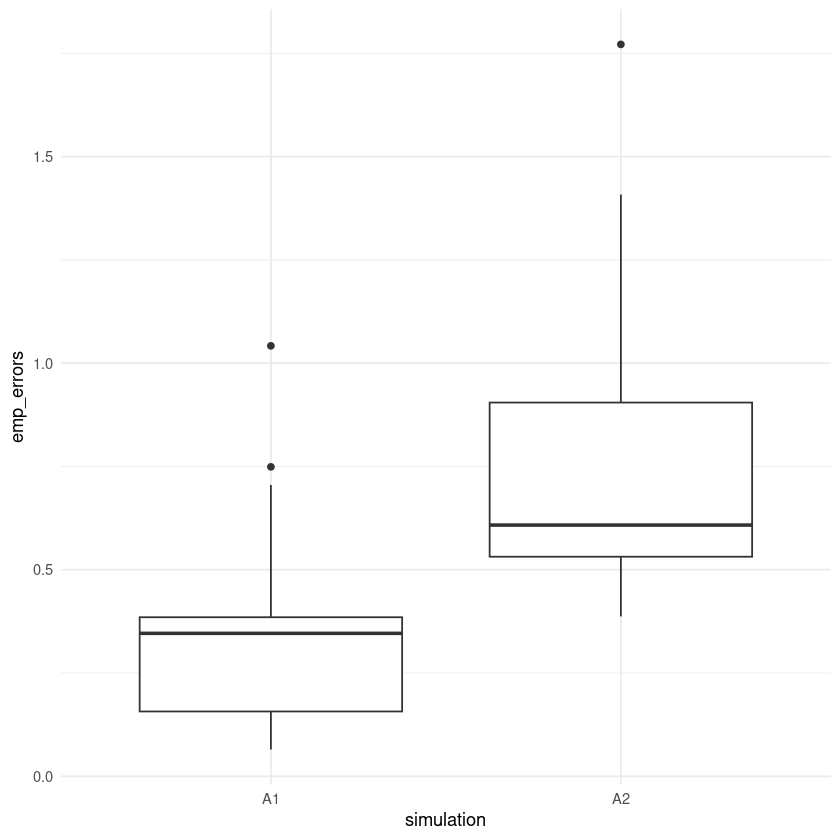

In [15]:
p1 <- ggplot(aes(x = simulation, y = emp_errors), data = plot_dat) + 
geom_boxplot() + 
theme_minimal()

p1

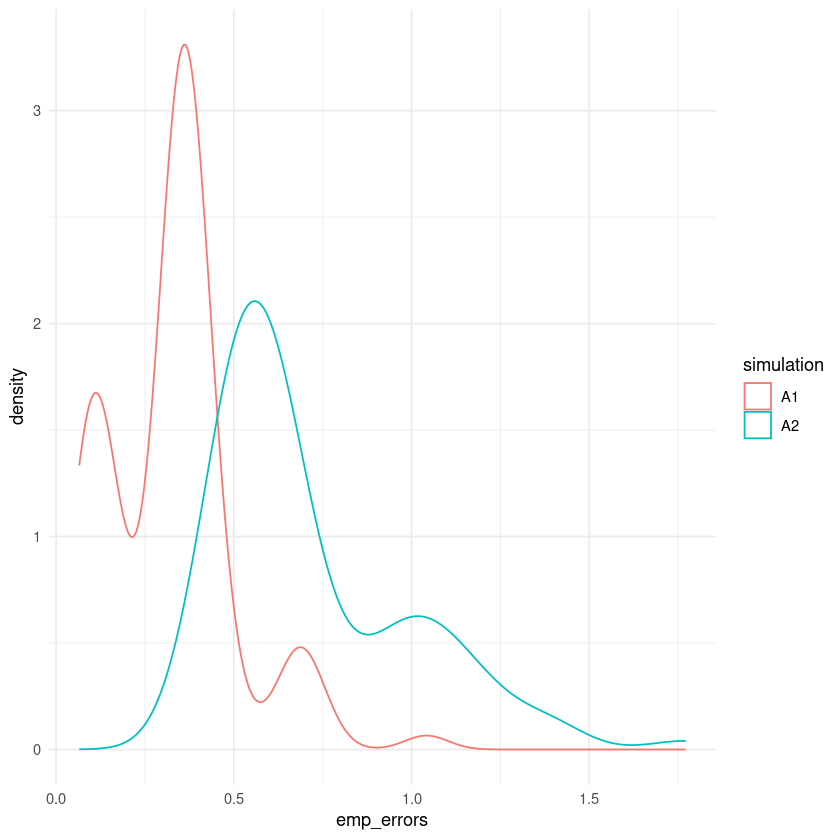

In [16]:
p2 <- ggplot(aes(x = emp_errors, color = simulation), data = plot_dat) + 
geom_density() + 
theme_minimal()

p2

In [17]:
ggsave("boxplots_mlmsim.png", p1)
ggsave("densplots_mlmsim.png", p2)

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
